# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [12]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [13]:
# 데이터 로드
# DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
DATA_PATH = r'C:\Users\skrke\statistics-practice-python\data\차량_연비_데이터(20022022).csv'
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [14]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [15]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
emissions = df['EMISSIONS']
# 산술평균
display(f"산술평균 : {emissions.mean().round(1)}")
# 중앙값
display(f"중앙값 : {emissions.median().round(1)}")
# 최빈값
display(f"최빈값 : {emissions.mode().values}")

# TODO 2: 절사평균 계산
display(f"절사평균10% : {stats.trim_mean(emissions, 0.1).round(1)}")
display(f"절사평균20% : {stats.trim_mean(emissions, 0.2).round(2)}")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
selected_class = ['COMPACT', 'MID-SIZE', 'SUV']
df_filtered = df[df['VEHICLE CLASS'].isin(selected_class)]

class_mean = df_filtered.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
display(class_mean.round(2))
weights_dict = {'COMPACT': 0.5, 'MID-SIZE': 0.3, 'SUV': 0.2}
weighted_mean = np.average(class_mean.loc[weights_dict.keys()], weights=list(weights_dict.values()))
display(f'가중평균:{weighted_mean.round(1)}')

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
class_vs = df_filtered.groupby('VEHICLE CLASS')['EMISSIONS'].agg(['mean', 'median'])
display(class_vs)

# TODO 5: 결과 해석 (display문으로 작성)
display("산술평균 250.1, 중앙값 243.0, 최빈값 221, 절사평균10% 247.3, 20% 245.4 / 차량등급별 가중평균 c 211.5 m 223.7 s 270.3 total 226.9 / 차량등급별 평균 중앙값 비교 c 211.5 207, m 223.7 221.0, s 270.3 267 -- 평균250이나 절사평균이나 중앙값 243보다 오른쪽으로 치우쳐저있고 최빈값이 221로 낮은 것으로 보아 특이적으로 높은 값이 있을 수 있는데, 차종별로 보니 suv는 270으로 높은 평균을 가졌는데 suv빈도는 낮은 것 같다. ")

'산술평균 : 250.1'

'중앙값 : 243.0'

'최빈값 : [221]'

'절사평균10% : 247.3'

'절사평균20% : 245.4'

VEHICLE CLASS
COMPACT     211.54
MID-SIZE    223.70
SUV         270.30
Name: EMISSIONS, dtype: float64

'가중평균:226.9'

,mean,median
VEHICLE CLASS,,
COMPACT,211.539175,207.0
MID-SIZE,223.700676,221.0
SUV,270.303030,267.0


'산술평균 250.1, 중앙값 243.0, 최빈값 221, 절사평균10% 247.3, 20% 245.4 / 차량등급별 가중평균 c 211.5 m 223.7 s 270.3 total 226.9 / 차량등급별 평균 중앙값 비교 c 211.5 207, m 223.7 221.0, s 270.3 267 -- 평균250이나 절사평균이나 중앙값 243보다 오른쪽으로 치우쳐저있고 최빈값이 221로 낮은 것으로 보아 특이적으로 높은 값이 있을 수 있는데, 차종별로 보니 suv는 270으로 높은 평균을 가졌는데 suv빈도는 낮은 것 같다. '

---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

,구분,평균,표준편차,최대,최소
0,comb,11.03,2.91,26.1,3.6
1,engine_size,3.36,1.34,8.4,0.8


,구분,CV
0,comb,26.38
1,engine_size,39.78



COMB (L/100 km) 이상치 개수: IQR=548, Z-score=219

ENGINE SIZE 이상치 개수: IQR=41, Z-score=41


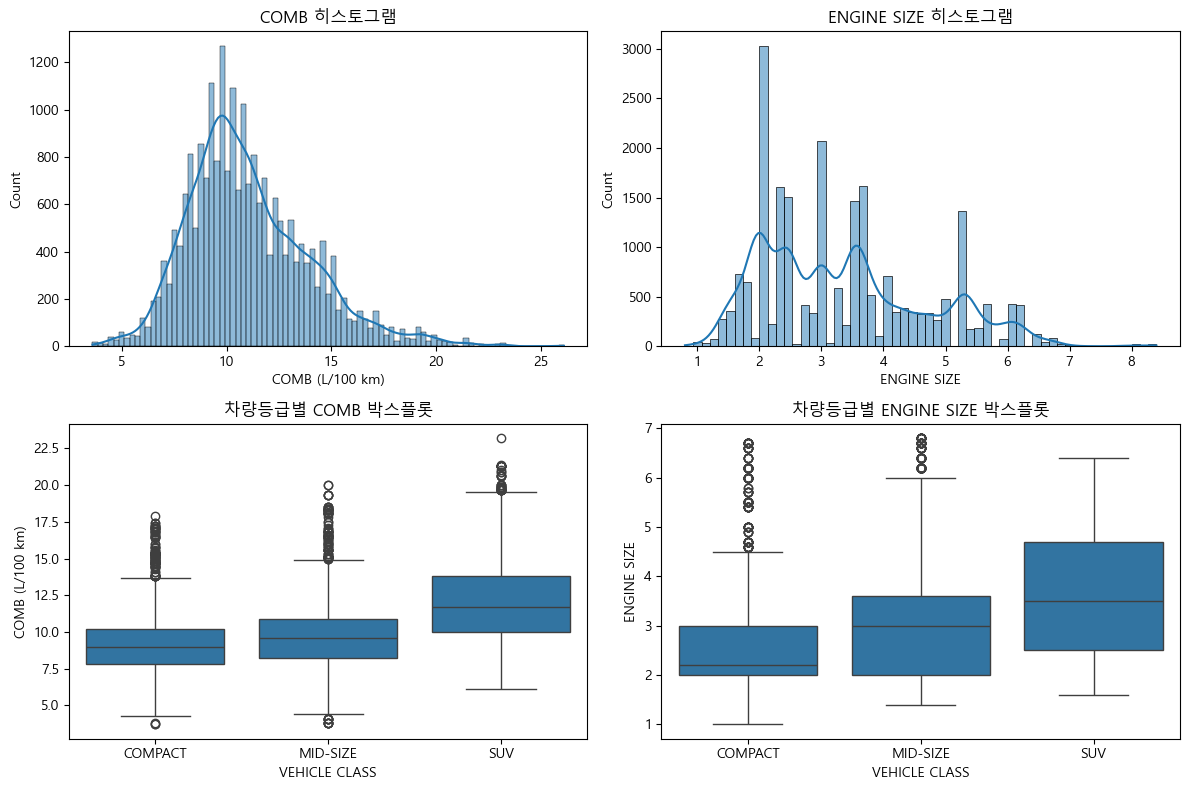

,COMB (L/100 km),ENGINE SIZE
VEHICLE CLASS,,
COMPACT,2.06,1.08
MID-SIZE,2.40,1.19
SUV,2.71,1.20


comb 평균 11 표준편차 2.9 최대 27 최소 3.6 cv 26 이상치 548, 219 히스토 좌편향 차량 편차적음 engine size 평균 3.36 표준편차 1.34 최대 8.4 최소 0.8 cv 40 이상치 41, 41 히스토 봉우리여럿형 차량 편차 큼-> comb 편차가 적은 종모양이고 / engine size는 차종별로 편차도 컸고 히스토그램도 여럿형이었다.


In [16]:
# TODO 1: 두 변수의 산포 측도 계산
comb = df['COMB (L/100 km)']
engine_size = df['ENGINE SIZE']

var_df = pd.DataFrame({'구분': ['comb', 'engine_size'],
    '평균' : [comb.mean(), engine_size.mean()],
    '표준편차' : [comb.std(), engine_size.std()],
    '최대' : [comb.max(), engine_size.max()],
    '최소' : [comb.min(), engine_size.min()],
}).round(2)
display(var_df)

# TODO 2: 변동계수(CV) 계산
cv_df = pd.DataFrame({
    '구분': ['comb', 'engine_size'],
    'CV': [comb.std() / comb.mean()*100, engine_size.std() / engine_size.mean()*100]
}).round(2)
display(cv_df)

# TODO 3: 이상치 탐지 (IQR, Z-score)
from scipy import stats

for col in ['COMB (L/100 km)', 'ENGINE SIZE']:
    # IQR 기준
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    
    # Z-score 기준
    z_scores = stats.zscore(df[col])
    outliers_z = df[col][(z_scores < -3) | (z_scores > 3)]
    
    print(f"\n{col} 이상치 개수: IQR={len(outliers_iqr)}, Z-score={len(outliers_z)}")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
import matplotlib.pyplot as plt
import seaborn as sns

selected_classes = ['COMPACT', 'MID-SIZE', 'SUV']
df_filtered = df[df['VEHICLE CLASS'].isin(selected_classes)]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 히스토그램
sns.histplot(comb, kde=True, ax=axes[0,0]).set(title='COMB 히스토그램')
sns.histplot(engine_size, kde=True, ax=axes[0,1]).set(title='ENGINE SIZE 히스토그램')

# 박스플롯
sns.boxplot(x='VEHICLE CLASS', y='COMB (L/100 km)', data=df_filtered, ax=axes[1,0]).set(title='차량등급별 COMB 박스플롯')
sns.boxplot(x='VEHICLE CLASS', y='ENGINE SIZE', data=df_filtered, ax=axes[1,1]).set(title='차량등급별 ENGINE SIZE 박스플롯')

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
std_by_class = df_filtered.groupby('VEHICLE CLASS')[['COMB (L/100 km)', 'ENGINE SIZE']].std().round(2)
display(std_by_class)

# TODO 6: 결과 해석
print("comb 평균 11 표준편차 2.9 최대 27 최소 3.6 cv 26 이상치 548, 219 히스토 좌편향 차량 편차적음 engine size 평균 3.36 표준편차 1.34 최대 8.4 최소 0.8 cv 40 이상치 41, 41 히스토 봉우리여럿형 차량 편차 큼-> comb 편차가 적은 종모양이고 / engine size는 차종별로 편차도 컸고 히스토그램도 여럿형이었다.")


---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

                컬럼        왜도        첨도
0      ENGINE SIZE  0.631264 -0.394947
1  COMB (L/100 km)  0.817065  1.054642
2       COMB (mpg)  1.172800  3.643618
3        EMISSIONS  0.534641  0.615430
2. 정리 해석 engine size = 왜도가 오른쪽꼬리약간김(평균보다 큰 값이 조금 많음), 첨도가 평평  / comb(l/100km) = 왜도 오른쪽꼬리김, 첨도가 뾰족(극단값 있음) / comb(mpg) = 오른쪽꼬리김, 첨도 매우 뾰족(극단값 큼) / emissions 오른쪽 꼬리 김, 첨도 약간뾰족


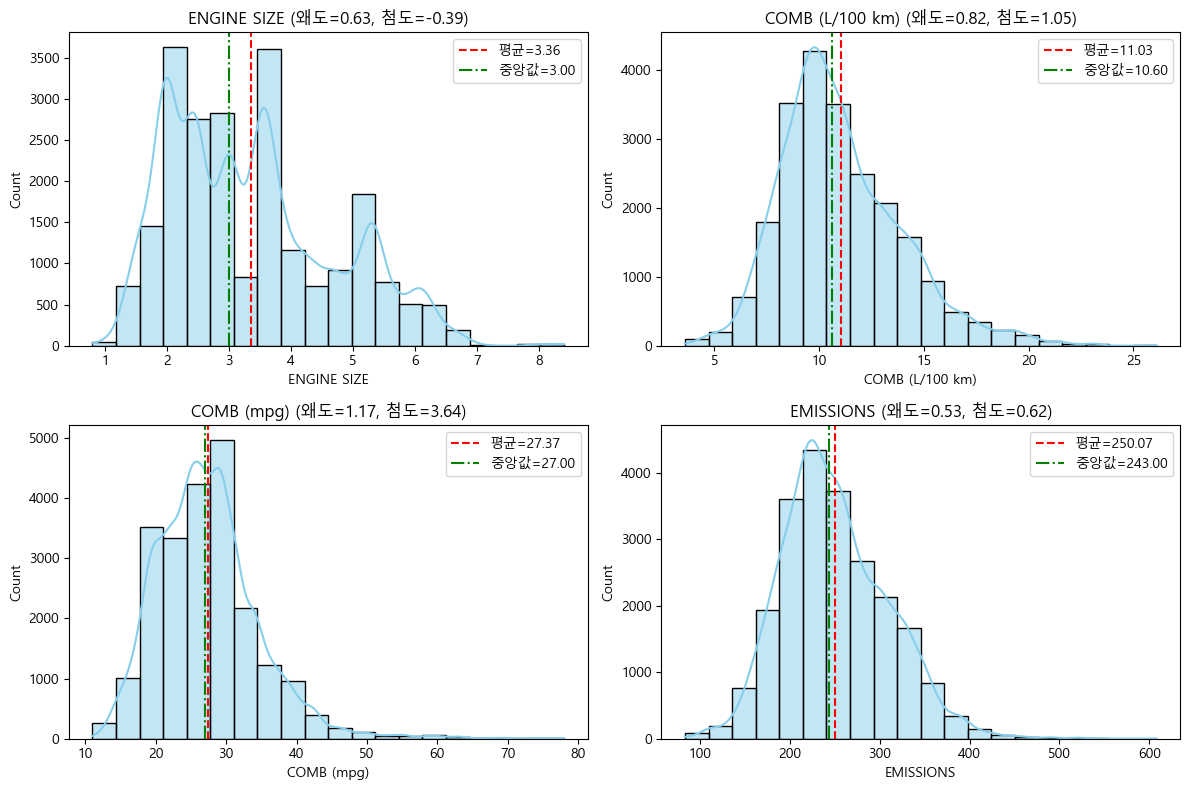

  FUEL        왜도        첨도
0    X  0.330538 -0.292857
1    Z  0.997177  1.607523
2    E -0.189320 -0.256257
3    N -1.851785  3.071255
4    D -0.367713 -1.042831
x연료는 오른쪽꼬리 치우침, 평평하여 극단값 적음 / z연료는 오른쪽으로 치우치며 극단값 살짝큼 / e연료는 왼쪽약간치우치며, 평평 / n연료는 왼쪽으로 많이 치우치며 극단값 가능성 큼 / d연료는 왼쪽으로 살짝 치우치며 극단값 적음


In [29]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
result = []
for col in numeric_cols:
    skew_col=df[col].skew()
    kurt_col=df[col].kurt()
    result.append({'컬럼': col, '왜도': skew_col, '첨도' : kurt_col})

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
df_col = pd.DataFrame(result)
print(df_col)
print("2. 정리 해석 engine size = 왜도가 오른쪽꼬리약간김(평균보다 큰 값이 조금 많음), 첨도가 평평  / comb(l/100km) = 왜도 오른쪽꼬리김, 첨도가 뾰족(극단값 있음) / comb(mpg) = 오른쪽꼬리김, 첨도 매우 뾰족(극단값 큼) / emissions 오른쪽 꼬리 김, 첨도 약간뾰족")

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # 2차원 → 1차원 배열로

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    data = df[col].dropna()  # 결측치 제거
    
    # 히스토그램 + KDE
    sns.histplot(data, kde=True, ax=ax, color='skyblue', bins=20)
    
    # 평균/중앙값 계산
    mean_val = data.mean()
    median_val = data.median()
    
    # 수직선 추가
    ax.axvline(mean_val, color='red', linestyle='--', label=f'평균={mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='-.', label=f'중앙값={median_val:.2f}')
    
    # 왜도/첨도
    skew_col = data.skew()
    kurt_col = data.kurt()
    
    # 제목에 왜도/첨도 표시
    ax.set_title(f'{col} (왜도={skew_col:.2f}, 첨도={kurt_col:.2f})')
    ax.legend()

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_types = df['FUEL'].unique()  # 연료 종류 확인
result_fuel = []

for fuel in fuel_types:
    data = df[df['FUEL'] == fuel]['EMISSIONS'].dropna()
    skew_col = data.skew()
    kurt_col = data.kurt()
    result_fuel.append({
        'FUEL': fuel,
        '왜도': skew_col,
        '첨도': kurt_col
    })

df_fuel_skew_kurt = pd.DataFrame(result_fuel)
print(df_fuel_skew_kurt)

# TODO 5: 결과 해석
# FUEL  왜도     첨도
# X  0.330538 -0.292857
# Z  0.997177  1.607523
# E -0.189320 -0.256257
# N -1.851785  3.071255
# D -0.367713 -1.042831
print("x연료는 오른쪽꼬리 치우침, 평평하여 극단값 적음 / z연료는 오른쪽으로 치우치며 극단값 살짝큼 / e연료는 왼쪽약간치우치며, 평평 / n연료는 왼쪽으로 많이 치우치며 극단값 가능성 큼 / d연료는 왼쪽으로 살짝 치우치며 극단값 적음")

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |